# Proccessing of proteomic data

### Package import 

In [2]:
import opendvp as dvp
import geopandas as gpd
import pandas as pd
import anndata as ad
import numpy as np
import scanpy as sc

import seaborn as sns
import matplotlib.pyplot as plt

/opt/homebrew/Caskroom/mambaforge/base/envs/opendvp_tut/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load adata object

In [2]:
adata = ad.read_h5ad("data/checkpoints/1_loaded/20250701_1252_1_loaded_adata.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 10 × 6763
    obs: 'Precursors.Identified', 'Proteins.Identified', 'Average.Missed.Tryptic.Cleavages', 'LCMS_run_id', 'RCN', 'RCN_long', 'QuPath_class'
    var: 'Protein.Group', 'Protein.Names', 'Genes', 'First.Protein.Description'

### First step, describe the dataset

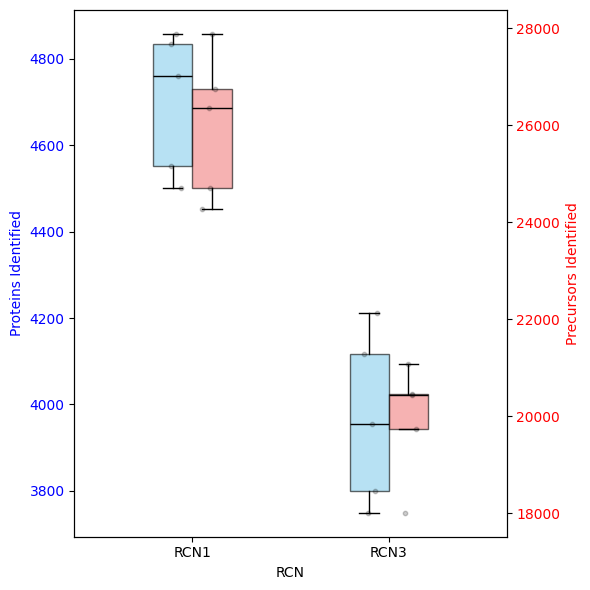

In [4]:
dvp.plotting.dual_axis_boxplots(adata_obs=adata.obs, feature_key="RCN")

### Let's plot some data

In [5]:
# Log2 transform the data
adata.X = np.log2(adata.X)

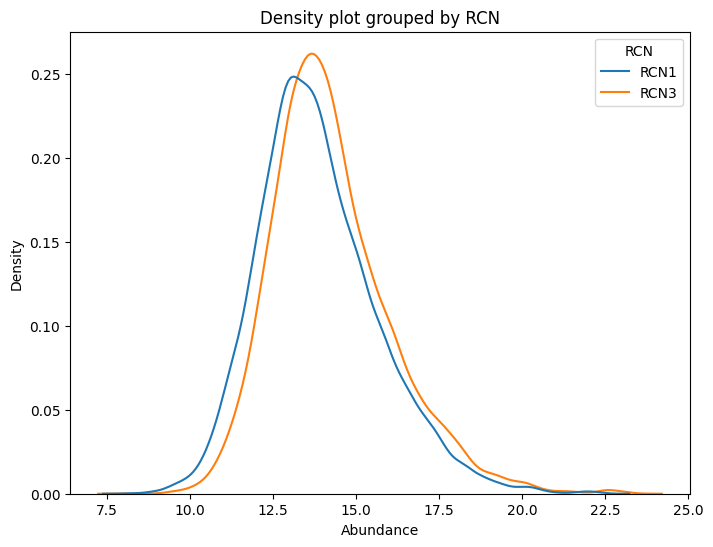

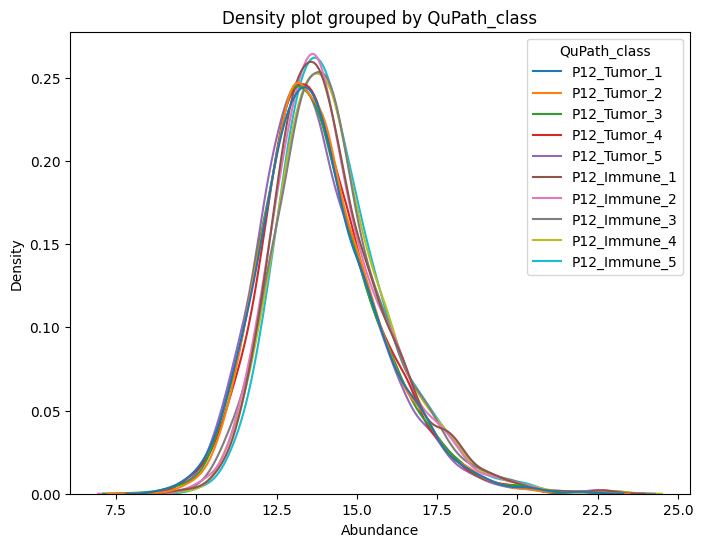

In [6]:
dvp.plotting.density(adata=adata, color_by="RCN")
dvp.plotting.density(adata=adata, color_by="QuPath_class")

## Filter dataset by NaNs

We expect a lot of proteins to be removed because this is a subsampled dataset.  
Many protein hits were present in other groups not present here.

In [7]:
adata_filtered = dvp.tl.filter_features_byNaNs(adata=adata, threshold=0.7, grouping="RCN")

15:17:07.39 | INFO | Filtering protein with at least 70.0% valid values in ANY group
15:17:07.39 | INFO | Calculating overall QC metrics for all features.
15:17:07.40 | INFO | Filtering by groups, RCN: ['RCN1', 'RCN3']
15:17:07.40 | INFO |  RCN1 has 5 samples
15:17:07.40 | INFO |  RCN3 has 5 samples
15:17:07.41 | INFO | Keeping proteins that pass 'ANY' group criteria.
15:17:07.41 | INFO | Complete QC metrics for all initial features stored in `adata.uns['filter_features_byNaNs_qc_metrics']`.
15:17:07.41 | INFO | 4637 proteins were kept.
15:17:07.41 | INFO | 2126 proteins were removed.
15:17:07.41 | SUCCESS | filter_features_byNaNs complete.


In [8]:
adata_filtered.uns['filter_features_byNaNs_qc_metrics'].head()

Protein.Group            Protein.Names               Genes  \
Gene                                                                       
TMA7      A0A024R1R8;Q9Y2S6   TMA7B_HUMAN;TMA7_HUMAN          TMA7;TMA7B   
IGLV8-61         A0A075B6I0              LV861_HUMAN            IGLV8-61   
IGLV3-10         A0A075B6K4              LV310_HUMAN            IGLV3-10   
IGLV3-9          A0A075B6K5               LV39_HUMAN             IGLV3-9   
IGKV2-28  A0A075B6P5;P01615  KV228_HUMAN;KVD28_HUMAN  IGKV2-28;IGKV2D-28   

                            First.Protein.Description  overall_mean  \
Gene                                                                  
TMA7      Translation machinery-associated protein 7B        13.391   
IGLV8-61          Immunoglobulin lambda variable 8-61        13.666   
IGLV3-10          Immunoglobulin lambda variable 3-10        14.216   
IGLV3-9            Immunoglobulin lambda variable 3-9        15.293   
IGKV2-28           Immunoglobulin kappa variable 2-28        15.343   

          overall_nan_count  overall_valid_count  overall_nan_proportions  \
Gene                                                                        
TMA7                      5                    5                      0.5   
IGLV8-61                  6                    4                      0.6   
IGLV3-10                  6                    4                      0.6   
IGLV3-9                   0                   10                      0.0   
IGKV2-28                  1                    9                      0.1   

          overall_valid  RCN1_mean  ...  RCN1_nan_proportions  RCN1_valid  \
Gene                                ...                                     
TMA7              False     13.029  ...                   0.4       False   
IGLV8-61          False     12.395  ...                   0.8       False   
IGLV3-10          False     13.335  ...                   0.6       False   
IGLV3-9            True     13.680  ...                   0.0        True   
IGKV2-28           True     14.014  ...                   0.2        True   

          RCN3_mean  RCN3_nan_count  RCN3_valid_count  RCN3_nan_proportions  \
Gene                                                                          
TMA7         13.933               3                 2                   0.6   
IGLV8-61     14.090               2                 3                   0.4   
IGLV3-10     15.097               3                 2                   0.6   
IGLV3-9      16.906               0                 5                   0.0   
IGKV2-28     16.407               0                 5                   0.0   

          RCN3_valid  valid_in_all_groups  valid_in_any_group  \
Gene                                                            
TMA7           False                False               False   
IGLV8-61       False                False               False   
IGLV3-10       False                False               False   
IGLV3-9         True                 True                True   
IGKV2-28        True                 True                True   

          not_valid_in_any_group  
Gene                              
TMA7                        True  
IGLV8-61                    True  
IGLV3-10                    True  
IGLV3-9                    False  
IGKV2-28                   False  

[5 rows x 22 columns]

In [9]:
adata_filtered.uns['filter_features_byNaNs_qc_metrics'].columns

Index(['Protein.Group', 'Protein.Names', 'Genes', 'First.Protein.Description',
       'overall_mean', 'overall_nan_count', 'overall_valid_count',
       'overall_nan_proportions', 'overall_valid', 'RCN1_mean',
       'RCN1_nan_count', 'RCN1_valid_count', 'RCN1_nan_proportions',
       'RCN1_valid', 'RCN3_mean', 'RCN3_nan_count', 'RCN3_valid_count',
       'RCN3_nan_proportions', 'RCN3_valid', 'valid_in_all_groups',
       'valid_in_any_group', 'not_valid_in_any_group'],
      dtype='object')

In this dataframe, stored away in adata.uns, you can see all th qc metrics of the filtering

In [10]:
# Store filtered adata
dvp.io.export_adata(adata=adata_filtered, path_to_dir="data/checkpoints", checkpoint_name="2_filtered")

15:17:12.78 | INFO | Writing h5ad
15:17:12.84 | SUCCESS | Wrote h5ad file


## Imputation

In [12]:
adata_imputed = dvp.tl.impute_gaussian(adata=adata_filtered, mean_shift=-1.8, std_dev_shift=0.3)

15:17:31.45 | INFO | Storing original data in `adata.layers['unimputed']`.
15:17:31.45 | INFO | Imputation with Gaussian distribution PER PROTEIN
15:17:31.46 | INFO | Mean number of missing values per sample: 572.6 out of 4637 proteins
15:17:31.46 | INFO | Mean number of missing values per protein: 1.23 out of 10 samples
15:17:33.35 | INFO | Imputation complete. QC metrics stored in `adata.uns['impute_gaussian_qc_metrics']`.


In [13]:
adata_imputed

AnnData object with n_obs × n_vars = 10 × 4637
    obs: 'Precursors.Identified', 'Proteins.Identified', 'Average.Missed.Tryptic.Cleavages', 'LCMS_run_id', 'RCN', 'RCN_long', 'QuPath_class'
    var: 'Protein.Group', 'Protein.Names', 'Genes', 'First.Protein.Description', 'mean', 'nan_proportions'
    uns: 'filter_features_byNaNs_qc_metrics', 'impute_gaussian_qc_metrics'
    layers: 'unimputed'

Like the previous process, the imputation stores two quality control datasets.  
First, the `impute_gaussian_qc_metrics`
Showing you per protein:
- how many values were imputed
- the distribution used
- the values used to impute with

In [14]:
adata_imputed.uns['impute_gaussian_qc_metrics']

n_imputed  imputation_mean  imputation_stddev  \
Gene                                                       
IGLV3-9            0        15.292778           1.840310   
IGKV2-28           1        15.343103           1.346909   
IGHV3-64           6        13.710045           1.247562   
IGKV2D-29          0        16.213394           1.481762   
IGKV1-27           0        13.452261           1.394043   
...              ...              ...                ...   
WASF2              0        15.135411           0.255652   
MAU2               1        12.475482           0.455856   
ENPP4              0        12.008373           0.630813   
MORC2              1        12.330734           0.783775   
SEC23IP            0        14.050191           0.227216   

                                              imputed_values  
Gene                                                          
IGLV3-9                                                  NAN  
IGKV2-28                                           [12.4703]  
IGHV3-64   [11.1396, 12.2713, 12.2389, 10.8992, 11.9149, ...  
IGKV2D-29                                                NAN  
IGKV1-27                                                 NAN  
...                                                      ...  
WASF2                                                    NAN  
MAU2                                                [11.636]  
ENPP4                                                    NAN  
MORC2                                              [10.7335]  
SEC23IP                                                  NAN  

[4637 rows x 4 columns]

Second, the unimputed values are stored inside the layers compartment of the adata object.  
This is a backup in case imputation has done something wrong.  
You can always call those values by `adata_imputed.layers['unimputed']`

In [15]:
dvp.io.export_adata(adata=adata_imputed, path_to_dir="data/checkpoints", checkpoint_name="3_imputed")

15:18:23.45 | INFO | Writing h5ad
15:18:23.51 | SUCCESS | Wrote h5ad file


### Scanpy's PCA

In [16]:
sc.pp.pca(adata_imputed)

Scanpy is a very powerful data analysis package created for single-cell RNA sequencing.  
We use it here because it is very convenient, and it already expects the AnnData format we have.  
Beware of using Scanpy for proteomics datasets, assumptions will vary.

In [17]:
adata_imputed

AnnData object with n_obs × n_vars = 10 × 4637
    obs: 'Precursors.Identified', 'Proteins.Identified', 'Average.Missed.Tryptic.Cleavages', 'LCMS_run_id', 'RCN', 'RCN_long', 'QuPath_class'
    var: 'Protein.Group', 'Protein.Names', 'Genes', 'First.Protein.Description', 'mean', 'nan_proportions'
    uns: 'filter_features_byNaNs_qc_metrics', 'impute_gaussian_qc_metrics', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'unimputed'

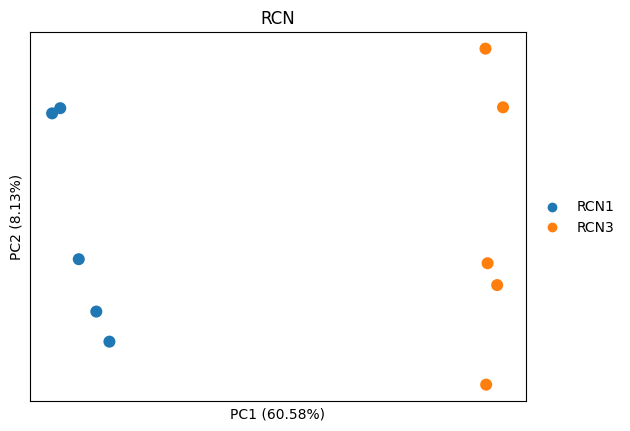

In [18]:
# let's plot it
sc.pl.pca(adata_imputed, color="RCN", annotate_var_explained=True, size=300)

4 [-0.38130396 -0.40484619]
52 [-0.39167196  0.581337  ]


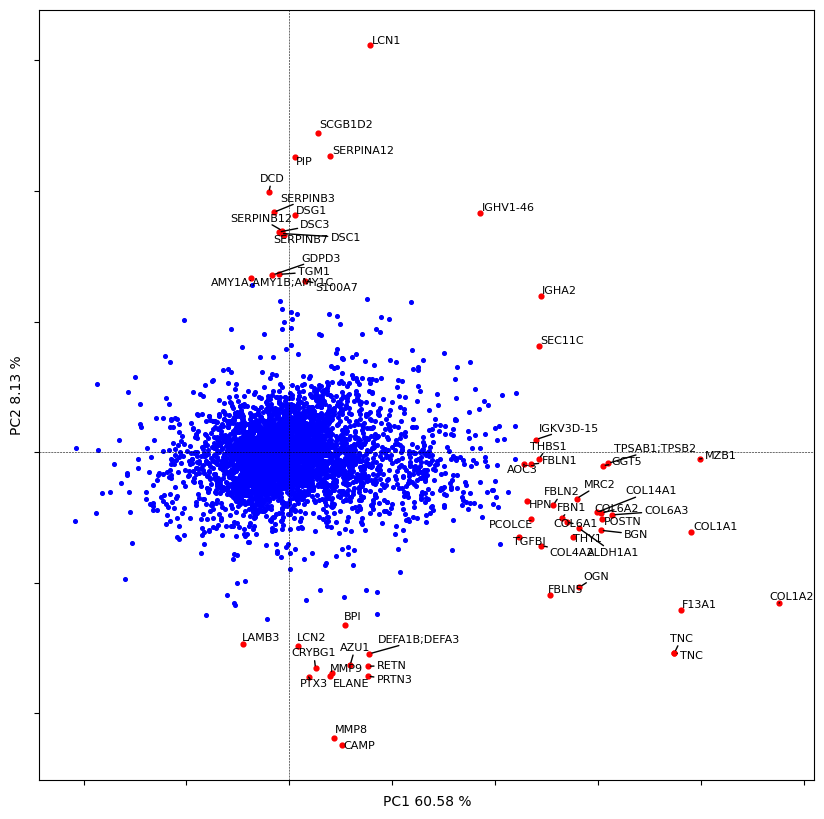

In [19]:
# let's plot the direction of each feature
dvp.plotting.pca_loadings(adata_imputed)

In [20]:
dvp.io.export_adata(adata=adata_imputed, path_to_dir="data/checkpoints", checkpoint_name="4_pca")

15:19:19.65 | INFO | Writing h5ad
15:19:19.71 | SUCCESS | Wrote h5ad file


### heatmap

/opt/homebrew/Caskroom/mambaforge/base/envs/opendvp_tut/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/homebrew/Caskroom/mambaforge/base/envs/opendvp_tut/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


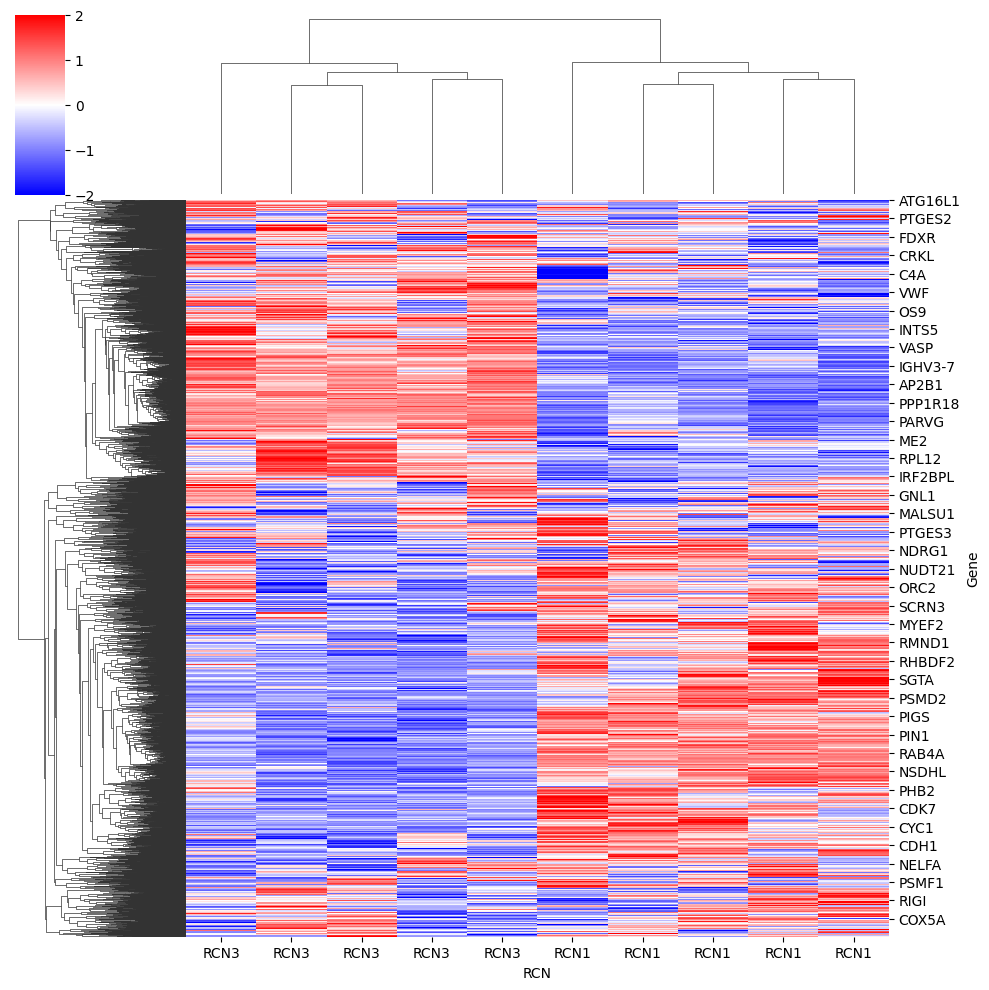

In [21]:
dataframe = pd.DataFrame(data=adata_imputed.X, columns=adata_imputed.var_names, index=adata_imputed.obs.RCN)
sns.clustermap(data=dataframe.T, z_score=0, cmap="bwr", vmin=-2, vmax=2)

## Differential analysis

In [22]:
# ttest
adata_DAP = dvp.tl.stats_ttest(adata_imputed, grouping="RCN", group1="RCN1", group2="RCN3", FDR_threshold=0.05)

15:20:10.81 | INFO | Using pingouin.ttest to perform unpaired two-sided t-test between RCN1 and RCN3
15:20:10.81 | INFO | Using Benjamini-Hochberg for FDR correction, with a threshold of 0.05
15:20:10.81 | INFO | The test found 1997 proteins to be significantly


In [71]:
adata_DAP

AnnData object with n_obs × n_vars = 10 × 4637
    obs: 'Precursors.Identified', 'Proteins.Identified', 'Average.Missed.Tryptic.Cleavages', 'LCMS_run_id', 'RCN', 'RCN_long', 'QuPath_class'
    var: 'Protein.Group', 'Protein.Names', 'Genes', 'First.Protein.Description', 'mean', 'nan_proportions', 't_val', 'p_val', 'mean_diff', 'sig', 'p_corr', '-log10_p_corr'
    uns: 'filter_features_byNaNs_qc_metrics', 'impute_gaussian_qc_metrics', 'pca', 'RCN_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'unimputed'

In [23]:
dvp.io.export_adata(adata=adata_DAP, path_to_dir="data/checkpoints", checkpoint_name="5_DAP")

15:21:26.28 | INFO | Writing h5ad
15:21:26.37 | SUCCESS | Wrote h5ad file


### plotting with volcano plot

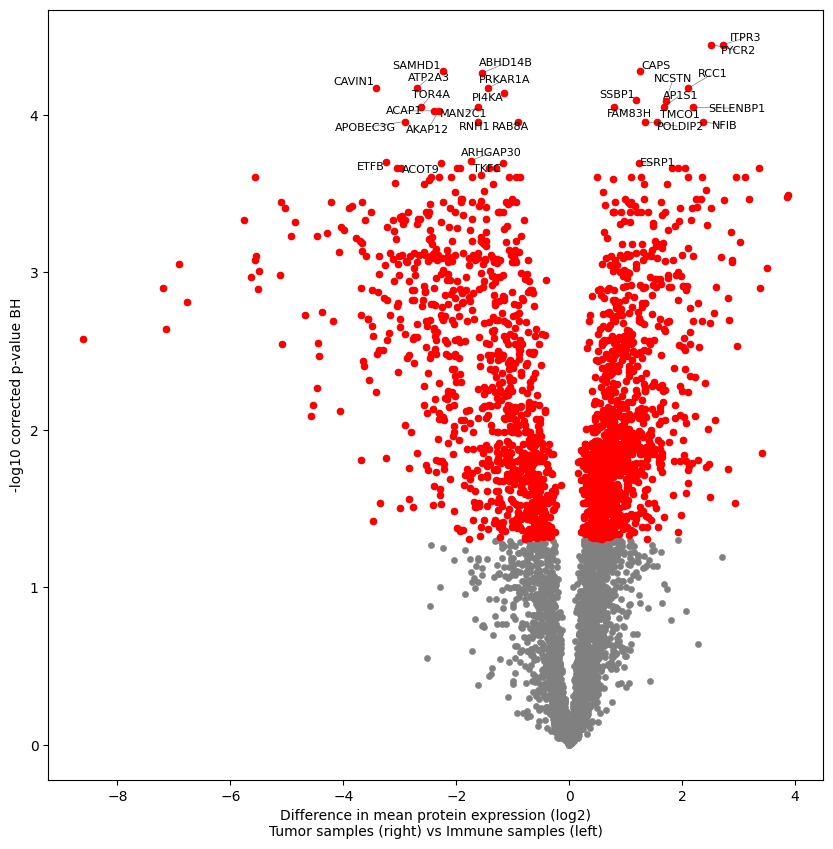

In [7]:
dvp.plotting.volcano(adata_DAP, x="mean_diff", y="-log10_p_corr", FDR=0.05, significant=True, tag_top=30, group1="Tumor samples", group2="Immune samples")